# **Statistical Analyst Time Series Using Sunspot Data**
---
pada tahap ini kita akan melakukan preprocesing data lebih lanjut dengan menggunakan statistical analyst 

## **1.Statistical Analyst Using Sunspot Data**

### **1.1 Import Library**
---
pertama kita akan melakukan import library yang dibutuhkan untuk proses analisis statistik pada data sunspot

In [4]:
# Import libraries
import os                           # For file system operations
import numpy as np                  # Numerical computations
import pandas as pd                 # Data manipulation
import matplotlib.pyplot as plt     # Visualization with Matplotlib
import seaborn as sns               # Visualization with Seaborn
from scipy import stats             # Statistical functions
from dateutil.parser import parse   # Parsing dates for time series

# Import statistical and time series analysis tools
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                  # ARIMA model

# Suppress warnings
from warnings import simplefilter
simplefilter('ignore')  # Ignore warnings for cleaner output

# Define a function to parse dates (useful for time series data)
dateparse = lambda dates: parse(dates)

plt.style.use('Solarize_Light2')

### **1.2 Load File CSV dengan library OS dan membaca file tersebut dengan pandas**
---
pada tahap ini kita akan melakukan load file yang sudah diolah sebelum nya pada kode exploration.ipynb dan menggunakan file tersebut untuk analisis lebih lanjut 

In [5]:
# Path ke folder
folder_path = "../data/raw"

# Menelusuri semua file di folder dan subfolder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):  # Menemukan file CSV
            file_path = os.path.join(root, file)
            print(f"File ditemukan: {file_path}")
            
            # Membaca file ke pandas
            df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=dateparse)
            
            # Menampilkan 5 baris pertama
            print(df.head())


File ditemukan: ../data/raw\Sunspots.csv
   Unnamed: 0       Date  Monthly Mean Total Sunspot Number
0           0 1749-01-31                               96.7
1           1 1749-02-28                              104.3
2           2 1749-03-31                              116.7
3           3 1749-04-30                               92.8
4           4 1749-05-31                              141.7


In [6]:
df = df.drop(columns='Unnamed: 0', axis=True).set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


### **1.3 Sunspots Data**

In [7]:
# Membaca data dari file
dta = df

# Membuat indeks waktu berdasarkan range tahun menggunakan pandas
date_range = pd.date_range(start="1700", end="2008", periods=len(dta))
dta.index = date_range
dta.index.freq = pd.infer_freq(dta.index)

# Menghapus kolom "YEAR" jika ada
if "YEAR" in dta.columns:
    del dta["YEAR"]

### membuat visualisasi untuk plot ACF dan PACF

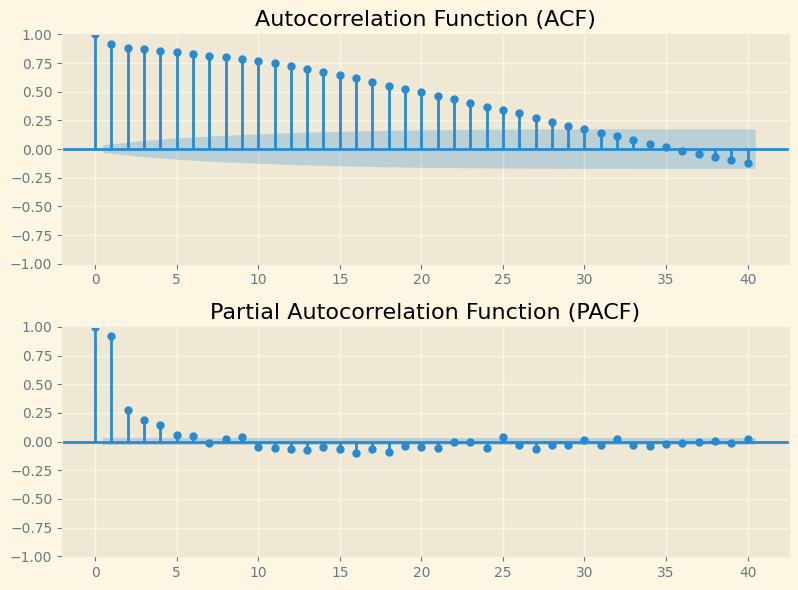

In [8]:
# Membuat plot ACF dan PACF
fig = plt.figure(figsize=(8, 6))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.arima.model import ARIMA

arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params) 

const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [10]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()

In [11]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

30404.770864851173 30429.118966733844 30413.492952720695


In [12]:
print(arma_mod30.params)

const      82.069181
ar.L1       0.614569
ar.L2       0.145285
ar.L3       0.191831
sigma2    646.169699
dtype: float64


In [13]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

30284.8088506678 30315.24397802114 30295.711460504703


In [14]:
sm.stats.durbin_watson(arma_mod30.resid.values)

2.053501805648196

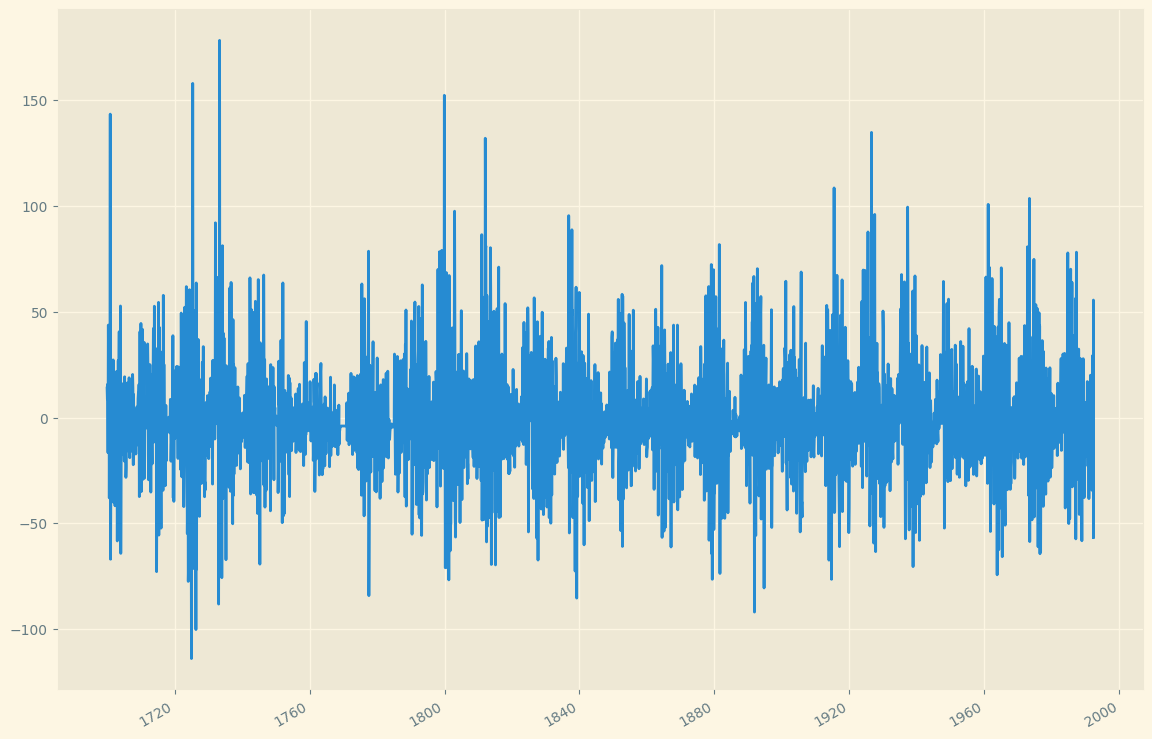

In [15]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax)

In [16]:
resid = arma_mod30.resid

In [17]:
stats.normaltest(resid)

NormaltestResult(statistic=461.74053054436115, pvalue=5.423975969454872e-101)

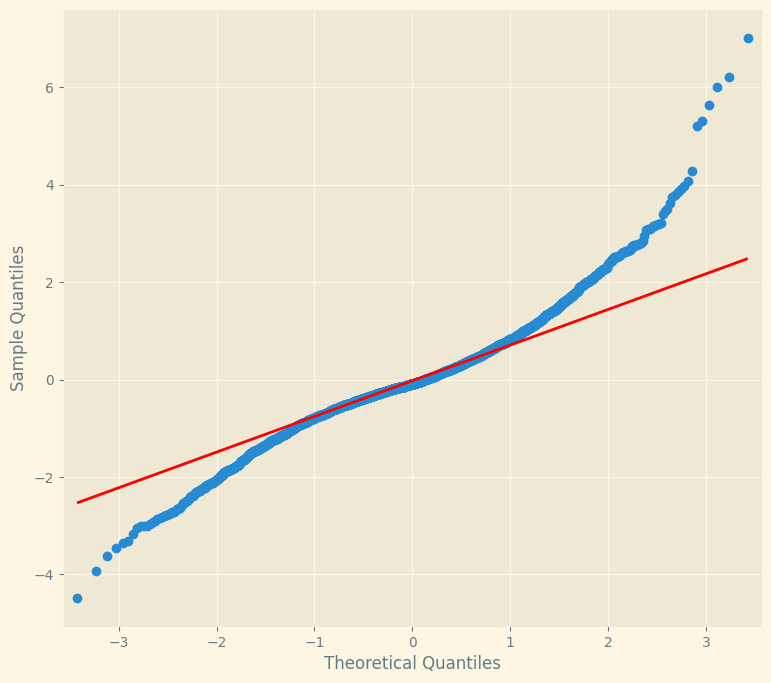

In [20]:
from statsmodels.graphics.gofplots import qqplot

# Membuat plot Q-Q
fig = plt.figure(figsize=(9, 8))
ax = fig.add_subplot(111)
qqplot(resid, line="q", ax=ax, fit=True)
plt.show()

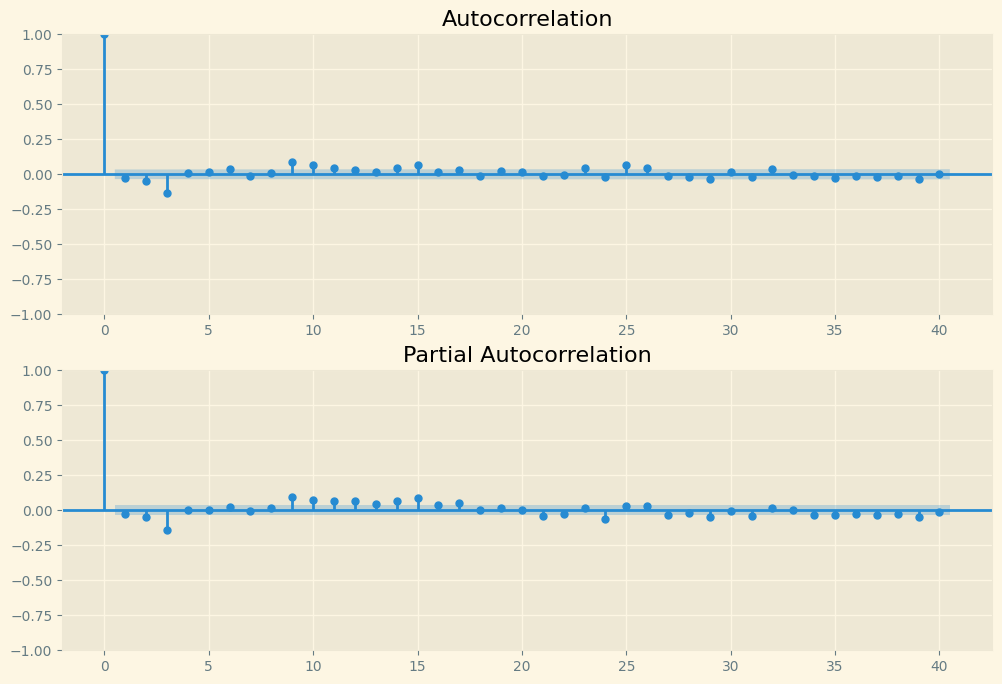

In [21]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)